In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import pairwise_distances
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# Step 1: Load your data from CSV file
df = pd.read_csv('FDS_TotalDataSet2.csv') # Replace with your CSV file path
# Assuming your comments are in a column named 'comments'
comments = df['Comment'] # Replace 'comments' with your actual column name

In [13]:
# Step 2: Create a bag-of-words representation
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(comments)

In [15]:
# Step 3: Compute the distance matrix
distances = pairwise_distances(X.toarray(), metric='euclidean')


In [16]:
# --- Top Words Visualization ---
word_counts = X.toarray().sum(axis=0)
words = vectorizer.get_feature_names_out()
top_words = pd.DataFrame({'word': words, 'count': word_counts})
top_words = top_words.sort_values(by='count', ascending=False).head(15)


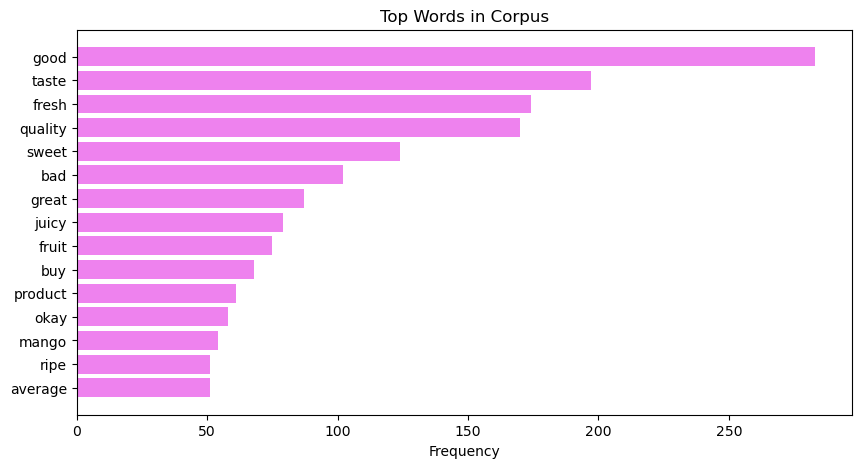

In [23]:
# Plot top words
plt.figure(figsize=(10, 5))
plt.barh(top_words['word'], top_words['count'], color='violet')
plt.xlabel('Frequency')
plt.title('Top Words in Corpus')
plt.gca().invert_yaxis() # Invert y-axis to have the highest frequency on top
plt.show()


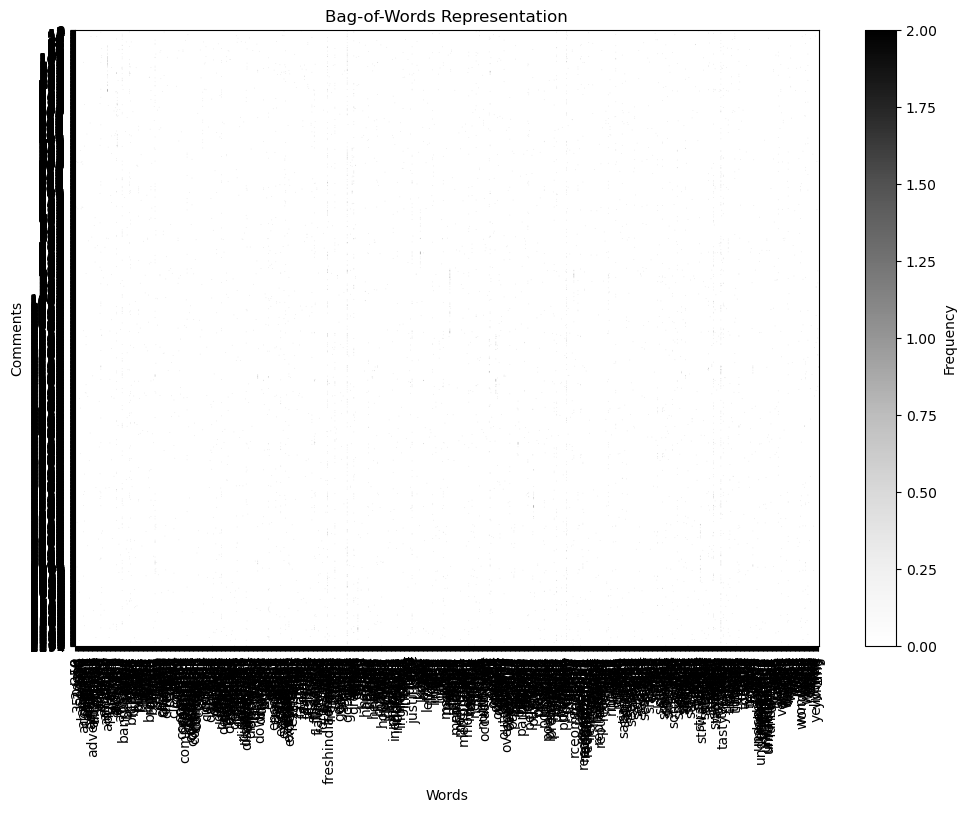

In [46]:
# --- Bag-of-Words Visualization ---
# Convert bag-of-words to DataFrame for better visualization
bag_of_words_df = pd.DataFrame(X.toarray(),
columns=vectorizer.get_feature_names_out())
plt.figure(figsize=(12, 8))
plt.imshow(bag_of_words_df, cmap='Greys', aspect='auto')
plt.colorbar(label='Frequency')
plt.title('Bag-of-Words Representation')
plt.xlabel('Words')
plt.ylabel('Comments')
plt.xticks(ticks=np.arange(len(bag_of_words_df.columns)),
labels=bag_of_words_df.columns, rotation=90)
plt.yticks(ticks=np.arange(len(bag_of_words_df)), labels=df.index)
plt.show()


In [58]:
# --- Agglomerative Clustering ---
# Step 4: Perform Agglomerative Clustering
agglo_model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
agglo_model.fit(distances)

C:\Users\eswar\anaconda3\anaconda\Lib\site-packages\scipy\cluster\hierarchy.py:796: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


AgglomerativeClustering(distance_threshold=0, n_clusters=None)

C:\Users\eswar\AppData\Local\Temp\ipykernel_6748\119435240.py:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix_agglo = linkage(distances, method='ward')


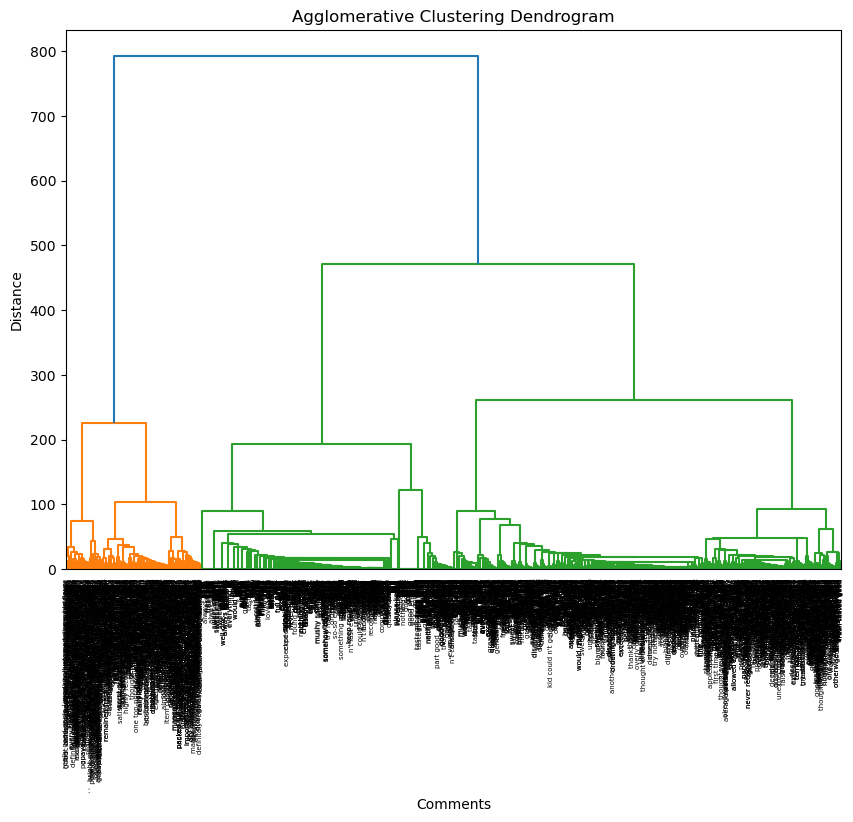

In [61]:
# Step 5: Plot Dendrogram for Agglomerative Clustering
linkage_matrix_agglo = linkage(distances, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix_agglo, labels=comments.values, leaf_rotation=90)
plt.title('Agglomerative Clustering Dendrogram')
plt.xlabel('Comments')
plt.ylabel('Distance')
plt.show()

C:\Users\eswar\AppData\Local\Temp\ipykernel_6748\1022878292.py:3: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix_hierarchical = linkage(distances, method='ward')


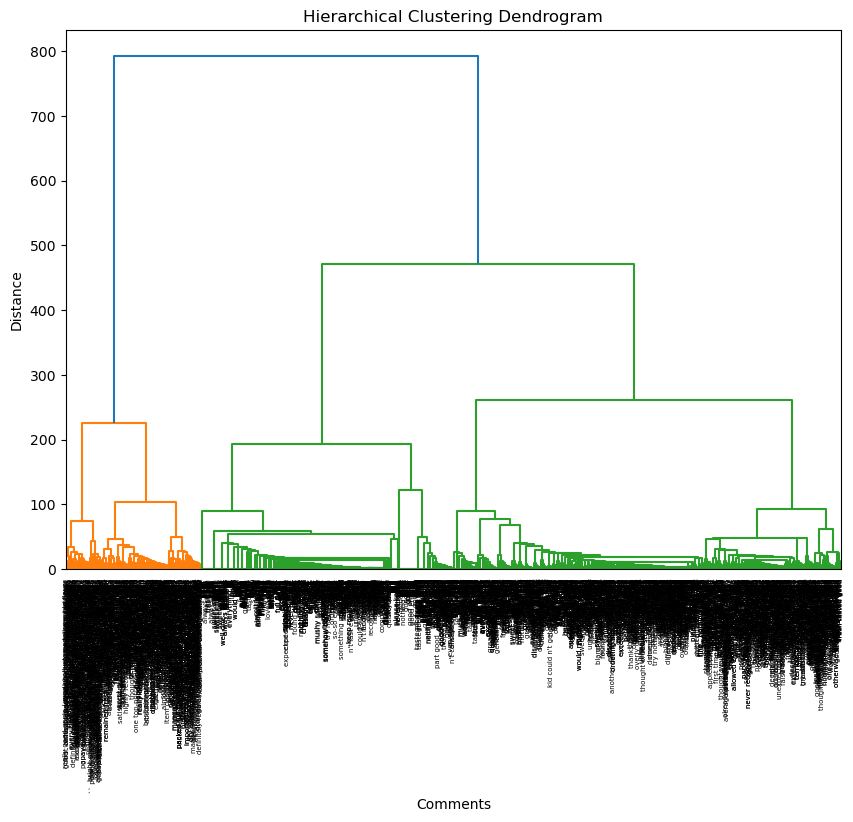

                        Comment  agglo_cluster  hierarchical_cluster
0                         fresh            249                   249
1                  good product            328                   328
2                        lively            317                   317
3                 straight farm            495                   495
4                 great quality            360                   360
...                         ...            ...                   ...
2290                waste money            416                   416
2291  pity give negative rating            595                   595
2292               horrid smell            460                   460
2293          develop dark spot            596                   596
2294      disappointed received            459                   459

[2295 rows x 3 columns]


In [68]:
# --- Hierarchical Clustering ---
# Step 6: Perform Hierarchical Clustering and plot dendrogram
linkage_matrix_hierarchical = linkage(distances, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix_hierarchical, labels=comments.values,
leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Comments')
plt.ylabel('Distance')
plt.show()
# Optional: Cut the dendrogram to form flat clusters
max_d = 5 # Adjust this threshold based on your dendrogram
clusters_agglo = fcluster(linkage_matrix_agglo, max_d, criterion='distance')
clusters_hierarchical = fcluster(linkage_matrix_hierarchical, max_d,criterion='distance')
# Adding the cluster labels to the DataFrame
df['agglo_cluster'] = clusters_agglo
df['hierarchical_cluster'] = clusters_hierarchical
# Print out the comments with their corresponding cluster labels
print(df[['Comment', 'agglo_cluster', 'hierarchical_cluster']])